# Przewidywanie kosztów leczenia na podstawie zbioru Medical Cost Personal Datasets

In [44]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [45]:
df = pd.read_csv("C:\\Users\\Anna\\Desktop\\insurance.csv")

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
df['bmi']=round(df['bmi'],0)
df['charges']=round(df['charges'],0)

In [49]:
df['bmi']=df['bmi'].astype(int) #zamiana na liczbę całkowitą

In [50]:
df['charges']=df['charges'].astype(int)

In [51]:
df.isnull().any()  #sprawdzanie czy są w zbiorze braki danych

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [52]:
df=pd.get_dummies(data=df, columns=['sex', 'region']) #zamiana na zmienne 0-1

In [53]:
df['smoker']=df['smoker'].replace('yes',1)
df['smoker']=df['smoker'].replace('no',0)

In [54]:
df.drop(['sex_male'], axis=1, inplace=True)
df.head()

,age,bmi,children,smoker,charges,sex_female,region_northeast,region_northwest,region_southeast,region_southwest
0,19,28,0,1,16885,1,0,0,0,1
1,18,34,1,0,1726,0,0,0,1,0
2,28,33,3,0,4449,0,0,0,1,0
3,33,23,0,0,21984,0,0,1,0,0
4,32,29,0,0,3867,0,0,1,0,0


In [55]:
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('charges', axis=1)
y_train = train['charges']

x_test = test.drop('charges', axis=1)
y_test = test['charges']

In [56]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
coeff_df = pd.DataFrame(regressor.coef_, df.drop('charges', axis=1).columns, columns=['Coefficient'])  
coeff_df #obliczenie współczynników, które pozwalają określić jak zmiana zmiennej o jednostkę wpłynie na zmianę kosztów
# leczenia (zminna zależna charges)  

,Coefficient
age,254.379795
bmi,352.856019
children,526.100635
smoker,23935.866289
sex_female,-27.343586
region_northeast,338.452909
region_northwest,-20.976049
region_southeast,-215.202406
region_southwest,-102.274455


In [58]:
y_pred = regressor.predict(x_test)

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1 #sprawdzenie jaka różnią się wartości przewidywane do rzeczywistych

,Actual,Predicted
225,11987,14345.655123
448,5911,7625.816585
387,30285,9566.177702
426,6555,7025.316938
901,48674,40445.110614
834,5377,8654.464109
476,35148,27253.965069
547,11538,18237.887303
91,10942,9775.872865
928,13471,16284.948291


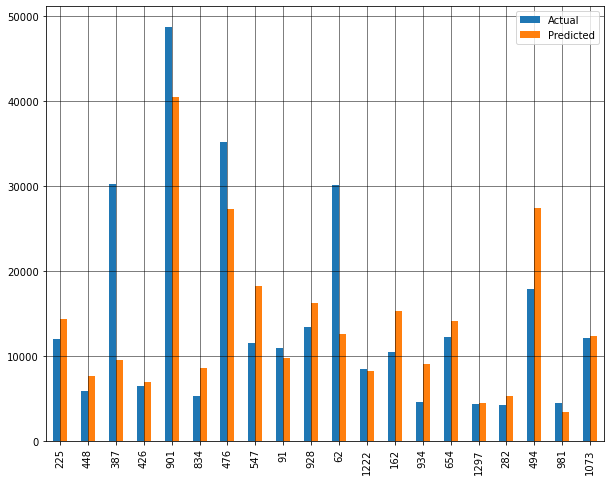

In [60]:
#wykres porównujący wartości przewidywane i rzeczywiste
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4143.35102975095
Mean Squared Error: 37322913.39443148
Root Mean Squared Error: 6109.248185696132
